In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc

main_dir = '/Users/mathieuleverge/git/chain_lumen/'

from scipy.optimize import curve_fit

data_dir = '/Users/mathieuleverge/git/chain_lumen/_data/'

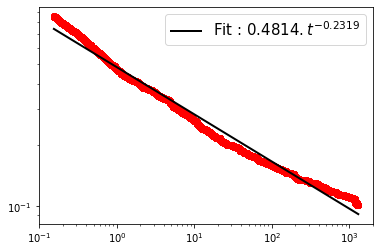

In [40]:
start, end = 30000, -70000
Nt_0 = 1000.


x, y = np.log(Nt[start:end, 0]), np.log(Nt[start:end, 1]/Nt_0)

def lin(x, a, b) :
    return a*x+b

popt, pcov = curve_fit(lin, x, y)
kappa_fit, alpha_fit = np.exp(popt[1]), popt[0]

plt.xscale('log')
plt.yscale('log')

#plt.plot(Nt[start:end, 0], Nt[start:end, 1]/1000., marker = 'o', linewidth=0, color = 'r')
plt.plot(Nt[start:end, 0], Nt[start:end, 1]/Nt_0, marker = 'o', linewidth=0, color = 'r')

#t = np.logspace(-2, -1)
t = np.linspace(0.16, 220., 1001)

kappa, alpha = .4, -2/5.
#plt.plot(t, kappa*t**alpha, label = r'$t^{-0.4}$', color = 'g')
kappa, alpha = .5, -1/3.
#plt.plot(t, kappa*t**alpha, label = r'$t^{-0.3}$', color = 'b')

plt.plot(Nt[start:end, 0], kappa_fit*Nt[start:end, 0]**alpha_fit, label = r'Fit : $'+"{:10.4f}".format(kappa_fit)+'.t^{'+"{:10.4f}".format(alpha_fit)+'}$', color = 'k', linewidth=2)
plt.legend(fontsize=15)
plt.show()


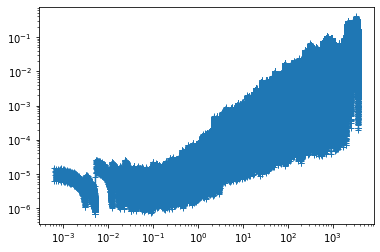

In [10]:
plt.xscale('log')
plt.yscale('log')
#start, end = 100, -1
tstep = Nt[1:, 0] - Nt[:-1, 0]
plt.plot(Nt[start+1:end, 0], tstep[start:end], marker='+')

# Comparison

In [16]:
folder = os.path.join(data_dir, 'hydrosmotic_hydraulic')
N_J7_noisy = np.loadtxt(os.path.join(folder, 'nlumens_J7_noisy.dat'))
#N_J7_noisy2 = np.loadtxt(os.path.join(folder, 'nlumens_J7_noisy 2.dat'))
N_J7_fractal = np.loadtxt(os.path.join(folder, 'nlumens_J7.dat'))
N_J8_fractal = np.loadtxt(os.path.join(folder, 'nlumens_J8.dat'))
N_1000 = np.loadtxt(os.path.join(folder, 'sim_nlum_N1000.dat'))
N_100 = np.loadtxt(os.path.join(folder, 'sim_nlum_N100.dat'))
N_50 = np.loadtxt(os.path.join(folder, 'sim_nlum_N50.dat'))

N_100_list = []
for elem in os.listdir(os.path.join(folder, 'N100')) :
    if elem != '.DS_Store' :
        N_100_list += [np.loadtxt(os.path.join(folder, 'N100', elem, 'sim_nlum.dat'))]

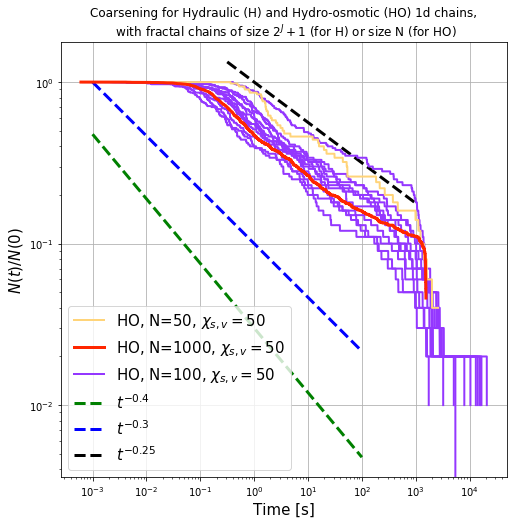

In [17]:
plt.figure(figsize=(8, 8))

plt.title('Coarsening for Hydraulic (H) and Hydro-osmotic (HO) 1d chains,\n with fractal chains of size $2^{J}+1$ (for H) or size N (for HO)')

plt.xscale('log')
plt.yscale('log')

plot_H, plot_HO = 0, 1

if plot_H :
    start, end = 1, -1
    plt.plot(N_J7_noisy[start:end, 0], N_J7_noisy[start:end, 1]/N_J7_noisy[0, 1], label='H, J=7 noisy', zorder=7)
    start, end = 1, -1
    plt.plot(N_J7_fractal[start:end, 0], N_J7_fractal[start:end, 1]/N_J7_fractal[0, 1], label = 'H, J=7', zorder=8)
    start, end = 1, -1
    plt.plot(N_J8_fractal[start:end, 0], N_J8_fractal[start:end, 1]/N_J8_fractal[0, 1], label = 'H, J=8', zorder=9)
    
if plot_HO :
    start, end = 100, -1
    plt.plot(N_50[start:end, 0], N_50[start:end, 1]/N_50[0, 1], label = r'HO, N=50, $\chi_{s,v}=50$', zorder=9, linewidth=2, color = '#FFD479')
    start, end = 100, -1
    plt.plot(N_1000[start:end, 0], N_1000[start:end, 1]/N_1000[0, 1], label = r'HO, N=1000, $\chi_{s,v}=50$', zorder=10, linewidth=3, color='#FF2600')
    start, end = 100, -1
    plt.plot(N_100[start:end, 0], N_100[start:end, 1]/N_100[0, 1], label = r'HO, N=100, $\chi_{s,v}=50$', zorder=8, linewidth=2, color = '#9437FF')

    for i in range(len(N_100_list)) :
        plt.plot(N_100_list[i][start:end, 0], N_100_list[i][start:end, 1]/N_100_list[i][0, 1], zorder=8, linewidth=2, color = '#9437FF')


t = np.logspace(-3, 2)#np.linspace(0.16, 220., 1001)

kappa, alpha = .03, -2/5.
plt.plot(t, kappa*t**alpha, label = r'$t^{-0.4}$', color = 'g', linewidth=3, linestyle='--')
kappa, alpha = .1, -1/3.
plt.plot(t, kappa*t**alpha, label = r'$t^{-0.3}$', color = 'b', linewidth=3, linestyle='--')

t = np.logspace(-.5, 3)
kappa, alpha = 1., -1/4.
plt.plot(t, kappa*t**alpha, label = r'$t^{-0.25}$', color = 'k', linewidth=3, linestyle='--')

plt.ylabel('$N(t)/N(0)$', fontsize=15)
plt.xlabel('Time [s]', fontsize=15)

plt.legend(fontsize=15)
plt.grid()


plt.show()

In [45]:
sys.version[0]

'3'

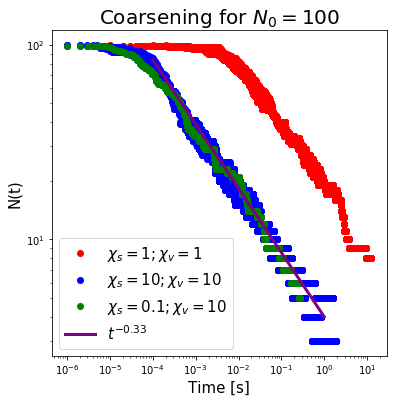

In [47]:
plt.figure(figsize = (6, 6))

plt.xscale('log')
plt.yscale('log')

color_list = ['b', 'r', 'g']

# xi_v = 300 ; xi_s = 300
plt.plot(data['xi300'][1][:, 0], data['xi300'][1][:, 1], marker='o', linewidth=0, color='r', label = r'$\chi_s=1 ; \chi_v = 1$')
plt.plot(data['xi300'][20][:, 0], data['xi300'][20][:, 1], marker='o', linewidth=0, color='r')
plt.plot(data['xi300'][21][:, 0], data['xi300'][21][:, 1], marker='o', linewidth=0, color='r')

# xi_v = 3000 ; xi_s = 3000
plt.plot(data['xi3000'][5][:, 0], data['xi3000'][5][:, 1], marker='o', linewidth=0, color='b', label = r'$\chi_s=10 ; \chi_v = 10$')
plt.plot(data['xi3000'][2][:, 0], data['xi3000'][2][:, 1], marker='o', linewidth=0, color='b')
plt.plot(data['xi3000'][4][:, 0], data['xi3000'][4][:, 1], marker='o', linewidth=0, color='b')
plt.plot(data['xi3000'][8][:, 0], data['xi3000'][8][:, 1], marker='o', linewidth=0, color='b')
plt.plot(data['xi3000'][6][:, 0], data['xi3000'][6][:, 1], marker='o', linewidth=0, color='b')
plt.plot(data['xi3000'][7][:, 0], data['xi3000'][7][:, 1], marker='o', linewidth=0, color='b')
#plt.plot(data['xi3000'][10][:, 0], data['xi3000'][10][:, 1], marker='o', linewidth=0, color='b')

# xi_v = 3000 ; xi_s = 30
plt.plot(data['xis30_xiv3000'][30][:, 0], data['xis30_xiv3000'][30][:, 1], marker='o', linewidth=0, color='g', label = r'$\chi_s=0.1 ; \chi_v = 10$')


kappa, alpha = 4., -0.33
plt.plot(np.logspace(-4, 0), kappa*np.logspace(-4, 0)**(alpha), color = 'purple', linewidth=3, label = r'$t^{'+str(alpha)+'}$')

#plt.plot(d[1:, 0], d[1:, 1], linewidth=0, marker = 'o')

#plt.plot(Nt[1:, 0], Nt[1:, 1])
plt.legend(fontsize=15)
plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('N(t)', fontsize=15)
plt.title(r'Coarsening for $N_0=100$', fontsize=20)
plt.show()

In [62]:
L = np.loadtxt('out/sim_lengths.dat')
Nt = np.loadtxt('out/sim_nlum.dat')

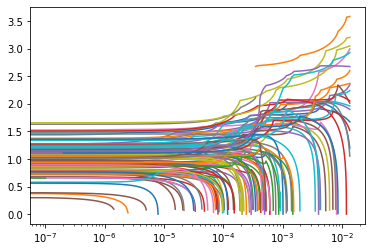

In [63]:
n = len(L[0])
plt.xscale('log')
for k in range(1, n) :
    plt.plot(L[:, 0], L[:, k])